# 第二章 线性回归模型
## 2.1.线性回归案例一、房价预测  

下表中，一行数据为一个样本。

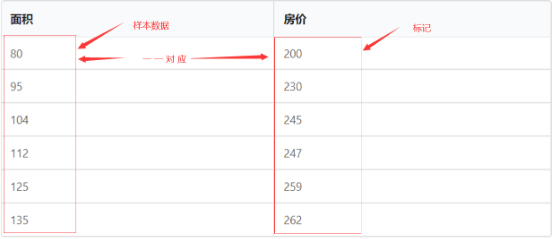  



### 课堂练习1

下面先将已有的样本点在二维空间中描绘出来，看看是否符合线性规律。  
根据data中的数据，绘制图形如下所示：

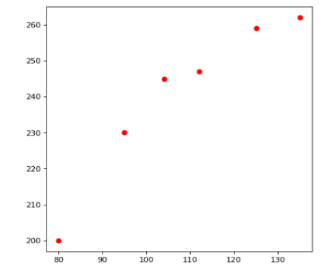

首先准备数据，采用Python的列表保存，如下：

data = np.array(
                [[80,200],
                 [95,230],
                 [104,245],
                 [112,247],
                 [125,259],
                 [135,262]]
)

In [3]:
import numpy as np
data=np.array(
                [[80,200],
                 [95,230],
                 [104,245],
                 [112,247],
                 [125,259],
                 [135,262]]
)
print(data)

[[ 80 200]
 [ 95 230]
 [104 245]
 [112 247]
 [125 259]
 [135 262]]


数据准备好，后开始绘图，代码如下：

```python
# 显示数据
import matplotlib.pyplot as plt 

# 绘制图形
X = data[:,0]
Y = data[:,1]

plt.scatter(X,Y,c="red")
plt.show()

```

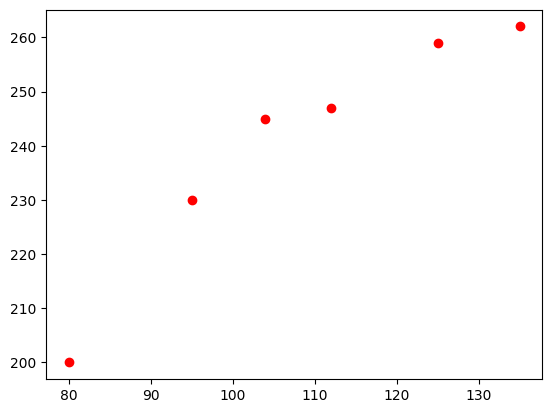

In [3]:
import matplotlib.pyplot as plt
x = data[:,0]
y = data[:,1]
plt.scatter(x,y,c="red")
plt.show()

### 课堂练习2


任务1：通过代码，使用两个样本，获得m和b

任务2：测试所有用例，计算所有用例预测得到的MSE。通过平均值，可对模型进行评价。

```
首先取出 2个样本
x1,y1 = data[0]
x2,y2 = data[1]
```

In [26]:
#首先取出 2个样本
x1,y1 = data[0]
x2,y2 = data[1]
print(x1,y1)
print(x2,y2)

80 200
95 230


```
因为有下列等式成立  
y1 = w * x1 + b  
y2 = w * x2 + b  

所以  
w = (y2 - y1) / (x2 - x1)  
b = y1 - w * x1  # or b = y2 - w * x2  
```

In [27]:
w = (y2 - y1) / (x2 - x1)
b = y1 - w * x1  # or b = y2 - w * x2
print(w,b)

2.0 40.0


先定义函数：

```python
def model(x):
    result = w * x + b
    return result

# 定义一个集合，保存所有的mse
mses = []
for x,y in data:
    mses.append((y-model(x))**2)
print(mses)
print("平均误差是：{0}".format(np.mean(mses)))
```

In [28]:
def model(x):
    result = w * x + b
    return result

mses = []
for x,y in data:
    print(y-model(x))
    mses.append((y-model(x))**2)
print(mses)
print("平均误差是：{0}".format(np.mean(mses)))

0.0
0.0
-3.0
-17.0
-31.0
-48.0
[0.0, 0.0, 9.0, 289.0, 961.0, 2304.0]
平均误差是：593.8333333333334


In [11]:
mses

[0.0, 0.0, 9.0, 289.0, 961.0, 2304.0]

### 课堂练习3

实现梯度下降的算法  
预测模型： f(x) = mx+b，用于预测房屋的真实价格  

首先要准备训练数据：
```
import numpy as np 
import matplotlib.pyplot as plt
data = np.array([[80,200],
                 [95,230],
                 [104,245],
                 [112,247],
                 [125,259],
                 [135,262]])
```

In [7]:

import numpy as np
import matplotlib.pyplot as plt
data = np.array([[80,200],
                 [95,230],
                 [104,245],
                 [112,247],
                 [125,259],
                 [135,262]])

求解f(x) = mx + b  ，其中（x，y）来自data，y为标记数据  

目标：y 与 f(x)之间的差距尽量小  
当前步骤：初始化参数
```
w = 1
b = 1
lr = 0.00001
```

In [8]:
w = 1
b = 1
lr = 0.00001

定义梯度下降函数
```python
def gradientdecent(w, b, data, lr):  # 当前的m，b和数据data，学习率lr 
    loss, mpd, bpd = 0, 0, 0  # loss 为均方误差，mpd为m的偏导数，bpd为b的偏导数
    for xi, yi in data:
        loss += (w * xi + b - yi) ** 2     # 计算mse
        bpd += (w * xi + b - yi) * 2       # 计算loss/b偏导数
        mpd += (w * xi + b - yi) * 2 * xi  # 计算loss/m偏导数
    # 更新m,b
    N = len(data)
    loss = loss / N
    mpd = mpd / N
    bpd = bpd / N
    w = w - mpd * lr
    b = b - bpd * lr
    return loss, w, b
```

In [9]:
#   梯度下降的函数
def gradientdecent(w, b, data, lr):  # 当前的m，b和数据data，学习率lr 
    loss, mpd, bpd = 0, 0, 0  # loss 为均方误差，mpd为m的偏导数，bpd为b的偏导数
    for xi, yi in data:
        loss += (w * xi + b - yi) ** 2     # 计算mse
        bpd += (w * xi + b - yi) * 2       # 计算loss/b偏导数
        mpd += (w * xi + b - yi) * 2 * xi  # 计算loss/m偏导数
    # 更新m,b
    N = len(data)
    loss = loss / N
    mpd = mpd / N
    bpd = bpd / N
    w = w - mpd * lr
    b = b - bpd * lr
    return loss, w, b

训练过程如下，结束条件通常为:  
+ 循环一定的次数
+ 或者符合某种条件后结束
```python
for epoch in range(3000000):
    mse,w,b = gradientdecent(w,b,data,lr)
    if epoch%100000 == 0:
        print(f"loss={mse:.4f},w={w:.4f},b={b:.4f}")
```

In [10]:
# 训练过程，循环一定的次数，或者符合某种条件后结束
for epoch in range(3000000):
    mse,w,b = gradientdecent(w,b,data,lr)
    if epoch%100000 == 0:
        print(f"loss={mse:.4f},w={w:.4f},b={b:.4f}")

loss=17206.3333,m=1.2848,b=1.0026
loss=408.1946,m=2.1179,b=7.5338
loss=370.0703,m=2.0626,b=13.7073
loss=335.9246,m=2.0102,b=19.5497
loss=305.3423,m=1.9607,b=25.0789
loss=277.9514,m=1.9138,b=30.3117
loss=253.4190,m=1.8694,b=35.2639
loss=231.4467,m=1.8274,b=39.9506
loss=211.7673,m=1.7876,b=44.3860
loss=194.1417,m=1.7500,b=48.5835
loss=178.3554,m=1.7144,b=52.5561
loss=164.2165,m=1.6807,b=56.3156
loss=151.5531,m=1.6488,b=59.8736
loss=140.2112,m=1.6186,b=63.2408
loss=130.0530,m=1.5901,b=66.4275
loss=120.9548,m=1.5630,b=69.4433
loss=112.8061,m=1.5375,b=72.2974
loss=105.5077,m=1.5133,b=74.9985
loss=98.9710,m=1.4903,b=77.5548
loss=93.1165,m=1.4687,b=79.9740
loss=87.8729,m=1.4481,b=82.2635
loss=83.1765,m=1.4287,b=84.4302
loss=78.9702,m=1.4103,b=86.4808
loss=75.2029,m=1.3929,b=88.4215
loss=71.8287,m=1.3765,b=90.2580
loss=68.8066,m=1.3609,b=91.9962
loss=66.0999,m=1.3462,b=93.6411
loss=63.6757,m=1.3322,b=95.1978
loss=61.5045,m=1.3190,b=96.6711
loss=59.5598,m=1.3065,b=98.0654


### 课堂练习4

利用Pytorch实现梯度下降  


In [ ]:
import torch
import numpy as np

data = np.array([[80,200],
                 [95,230],
                 [104,245],
                 [112,247],
                 [125,259],
                 [135,262]])

In [23]:
w = torch.tensor(1,dtype=torch.float32,requires_grad=True) #w = 1
b = torch.tensor(1,dtype=torch.float32,requires_grad=True) #b = 1
lr = 0.00001

利用pytorch计算参数的梯度

先取出一个样本（例如 x,y = data[0]）做个测试，看看pytorch自动计算和手工计算的梯度值，是否一样。

In [24]:
# 定义前向传播f(x)
def forward(x):
    global w, b
    return w * x + b

# 取出一个样本
x,y = data[0]
# 计算损失
loss = (forward(x)-y)**2
# 向后传播
loss.backward()

print(loss.grad_fn)
print(f"w.grad={w.grad},b.grad={b.grad}")

w.grad=-19040.0,b.grad=-238.0


In [25]:
with torch.no_grad():   # 不使用pytorch的自动梯度计算
    m_loss = (w * x + b - y) ** 2     # 计算 loss （为了与前面的区分开）
    bpd = (w * x + b - y) * 2         # 计算loss/b偏导数
    mpd = (w * x + b - y) * 2 * x     # 计算loss/m偏导数
    print(mpd)
    print(bpd)

tensor(-19040.)
tensor(-238.)


根据结果可知，pytorch自动计算与手工计算的梯度完全相同。  

因此，利用pytorch，训练过程可以简化为：

In [20]:
import torch
import numpy as np

data = np.array([[80,200],
                 [95,230],
                 [104,245],
                 [112,247],
                 [125,259],
                 [135,262]])

w = torch.tensor(1,dtype=torch.float32,requires_grad=True) 
b = torch.tensor(1,dtype=torch.float32,requires_grad=True) 
lr = 0.00001
X = torch.tensor(data[:,0],requires_grad=False)    # 整批训练
Y = torch.tensor(data[:,1],requires_grad=False)    # 整批训练


In [21]:
# 1.正向传播函数（模型计算图，此时数据和方法是分离的）
def forward(w, X):  # 构建计算图
    # global w, b
    return X*w + b

# 2.损失函数


def lossFunction(y_pred, y):  # 确定损失函数
    return ((y_pred - y)**2).mean()  # 成批计算，从X和Y的定义也可以看出


# 3. 模型训练过程
epochs = 100000  # 3000000
for epoch in range(epochs):     # epochs为训练的次数
    # 1.正向传播
    pred = forward(w, X)
    # 2.计算损失
    loss = lossFunction(pred, Y)
    # 3.向后传播
    loss.backward()
    # 4.更新参数
    w.data = w.data - lr * w.grad
    b.data = b.data - lr * b.grad
    # 5.清空梯度
    w.grad.zero_()

    if epoch % 10000 == 0:
        print(f"loss={loss.item()},w={w.item()}")

loss=17206.333984375,w=1.2848433256149292
loss=67.80033874511719,w=1.3568352460861206
loss=81.35521697998047,w=0.7518321871757507
loss=76.15877532958984,w=0.7741553783416748
loss=43.137603759765625,w=1.0577750205993652
loss=48.12063980102539,w=1.209481120109558
loss=45.22855758666992,w=1.1689826250076294
loss=42.89302062988281,w=1.0779629945755005
loss=43.4680061340332,w=1.0442055463790894
loss=43.00935745239258,w=1.0657206773757935
